# Π Study
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 9/10/2021|

## Python Imports

In [12]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import fft

## Run Parameters

In [13]:
runs = ['AB/0.01', 'AB/0.01-1024', 'AB/0.02', 'AB/0.02-sbox', 'AB/0.02-1024',
        'AB/0.02-CFL0.3', 'AB/0.05-128', 'AB/0.05-256', 'AB/0.05', 'AB/0.05-1024',
        'AB/0.10',
        'BA/0.01-128', 'BA/0.01-256', 'BA/0.01',  'BA/0.01-1024', 'BA/0.02',
        'BA/0.05-128', 'BA/0.05-256', 'BA/0.05', 'BA/0.05-1024', 'BA/0.10']
Pis, tau_ss, epsilons, Ls, Ns, Nps, tlims = [], [], [], [], [], [], []


for run in runs:
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%run)
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    Pi = athinput['problem']['duy0']                    # Π / c_s
    Pis.append(Pi)
    Nx = athinput['mesh']['nx1']                        # Radial x zones
    Ny = athinput['mesh']['nx3']                        # Azimuthal y zones
    Nz = athinput['mesh']['nx2']                        # Vertical z zones
    Ns.append(r'${:.0f} \times {:.0f} \times {:.0f}$'.format(Nx, Ny, Nz))
    Lx = (athinput['mesh']['x1max'] - athinput['mesh']['x1min'])
    Ly = (athinput['mesh']['x3max'] - athinput['mesh']['x3min'])
    Lz = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])
    Ls.append(r'${:.2f} \times {:.2f} \times {:.2f}$'.format(Lx, Ly, Lz))
    Np_tot = athinput['problem']['npx1']\
             *athinput['problem']['npx2']\
             *athinput['problem']['npx3']               # total number of particles
    exp = int(np.log10(Np_tot))
    sig = Np_tot/10**int(exp)
    Nps.append(r'${:.1f}\times10^{:d}$'.format(sig, exp))
    Omega = athinput['problem']['omega']                # local Keplerian ang. freq.
    tlims.append(hst['time'][-1])                       # time limit [T]
    epsilons.append(athinput['problem']['epsilon'])     # avg. BG dust/gas ρ-ratio
    tau_ss.append(athinput['particles']['taus0']*Omega) # dimensionless stopping time

df = pd.DataFrame(
    {
        "Run": runs,
        r"$\Pi$": Pis,
        r"$\tau_s$": tau_ss,
        r"$\epsilon$": epsilons,
        r"$L_x \times L_y \times L_z\,[H]$": Ls,
        r"$N_x \times N_y \times N_z$": Ns,
        r"$N_p$": Nps,
        r"$\Delta t\,/\,T$": tlims
    }
)
df.style.format({
    r"$\Pi$": r"${:.2f}$",
    r"$\tau_s$": r"${:.1f}$",
    r"$\epsilon$": r"${:.1f}$",
    r"$\Delta t\,/\,T$": r"${:.0f}\,$",
})

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

# AB

### Saturation (512²)

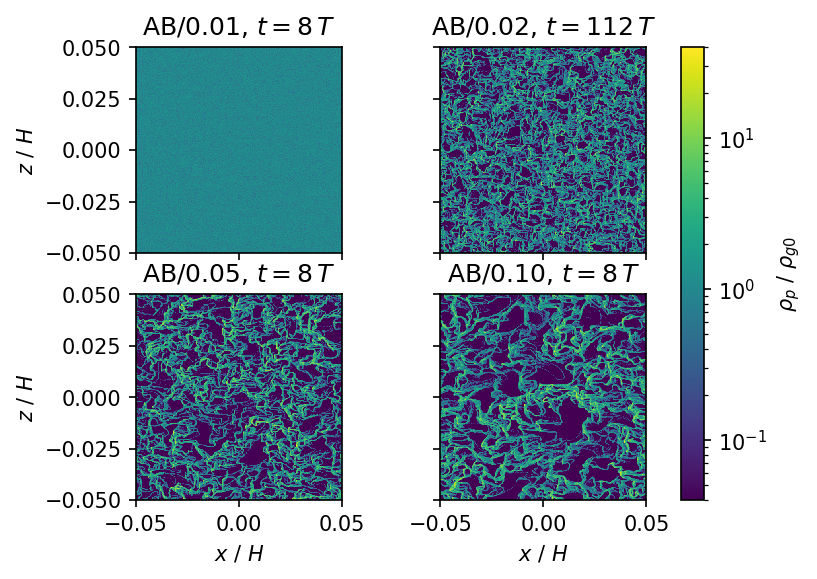

In [32]:
fig, axs = plt.subplots(2, 2, dpi=150)
runs = ['AB/0.01', 'AB/0.02', 'AB/0.05', 'AB/0.10']
vmin, vmax = 0.04, 40

for i,ax in enumerate(axs.flat):
    # Load run snapshot
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%runs[i])
    c_s = athinput['hydro']['iso_sound_speed'] # sound speed
    Omega = athinput['problem']['omega']       # local Keplerian angular frequency
    H = c_s/Omega                              # gas scale height
    T = 2*np.pi/Omega                          # orbital period
    outputs = sorted(list(Path('../nonlinear/Pi/%s/athdf/'%runs[i]).glob(
                  athinput["job"]["problem_id"]+'.out2.*.athdf')))
    data = athena_read.athdf(outputs[0])
    xf, zf = data['x1f']/H, data['x2f']/H
    clipped = np.clip(data['rhop'][0], vmin, vmax)
    
    # Plot
    img = ax.pcolormesh(xf, zf, clipped, norm=colors.LogNorm(vmin, vmax))
    ax.set(title=r'{:s}, $t={:.0f}\,T$'.format(runs[i], data['Time']),
           aspect='equal', xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.label_outer()
cb = fig.colorbar(img, ax=axs[:,:])
cb.set_label(r'$\rho_p$ / $\rho_{g0}$')

### Saturation (1024²)

IndexError: list index out of range

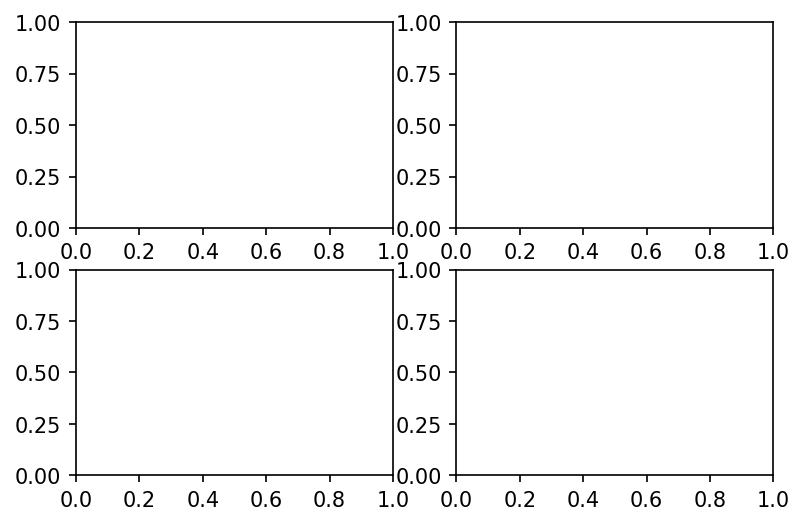

In [33]:
fig, axs = plt.subplots(2, 2, dpi=150)
runs = ['AB/0.01-1024', 'AB/0.02-1024', 'AB/0.05-1024', 'AB/0.10-1024']
vmin, vmax = 0.04, 40

for i,ax in enumerate(axs.flat):
    # Load run snapshot
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%runs[i])
    c_s = athinput['hydro']['iso_sound_speed'] # sound speed
    Omega = athinput['problem']['omega']       # local Keplerian angular frequency
    H = c_s/Omega                              # gas scale height
    T = 2*np.pi/Omega                          # orbital period
    outputs = sorted(list(Path('../nonlinear/Pi/%s/athdf/'%runs[i]).glob(
                  athinput["job"]["problem_id"]+'.out2.*.athdf')))
    data = athena_read.athdf(outputs[0])
    xf, zf = data['x1f']/H, data['x2f']/H
    clipped = np.clip(data['rhop'][0], vmin, vmax)
    
    # Plot
    img = ax.pcolormesh(xf, zf, clipped, norm=colors.LogNorm(vmin, vmax))
    ax.set(title=r'{:s}, $t={:.0f}\,T$'.format(runs[i], data['Time']),
           aspect='equal', xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.label_outer()
cb = fig.colorbar(img, ax=axs[:,:])
cb.set_label(r'$\rho_p$ / $\rho_{g0}$')

## AB, Π=0.01

### Dust Density Dispersion

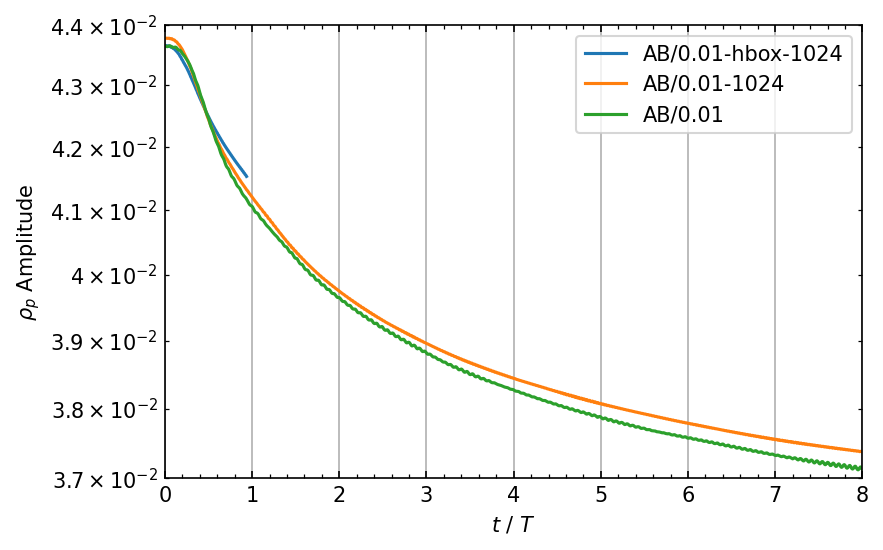

In [15]:
fig, ax = plt.subplots(dpi=150)
runs = {
#         'AB/0.01-hbox-2048': ['tab:red', 'solid'],
        'AB/0.01-hbox-1024': ['tab:red', 'dotted'],
        'AB/0.01-1024':      ['tab:red', 'dashed'],
        'AB/0.01':           ['tab:red', 'dashdot']}

for run in runs:
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s
    ax.semilogy(times, rhop_amps, label=run)

ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\rho_p$ Amplitude',
       xlim=(0, 8), ylim=(3.7e-2, 4.4e-2))
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

## AB, Π=0.02

### Dust Density Dispersion

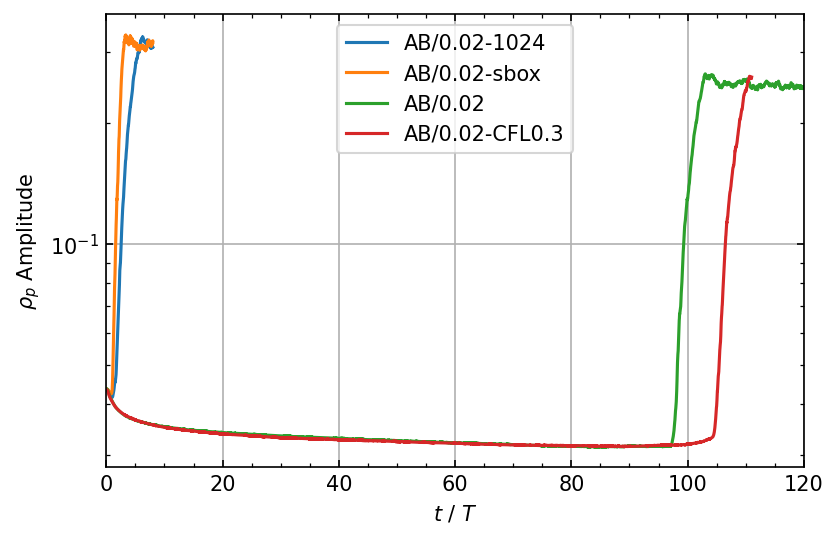

In [53]:
fig, ax = plt.subplots(dpi=150)
runs = {'AB/0.02-1024':   ['lightskyblue'],
        'AB/0.02-sbox':   ['dodgerblue'],
        'AB/0.02':        ['tab:blue'],
        'AB/0.02-CFL0.3': ['darkblue']}

for run in runs:
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s
    ax.semilogy(times, rhop_amps, label=run)

ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\rho_p$ Amplitude',
       xlim=(0, 120))
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

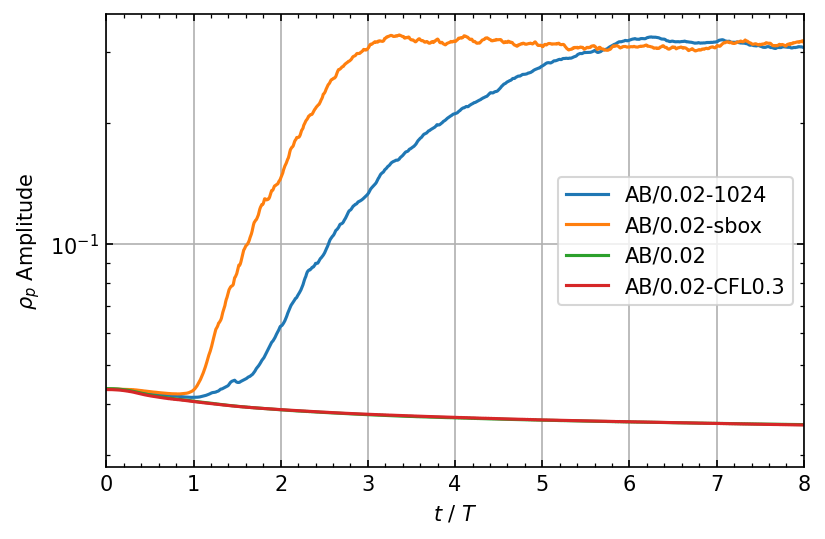

In [54]:
fig, ax = plt.subplots(dpi=150)
runs = {'AB/0.02-1024':   ['lightskyblue'],
        'AB/0.02-sbox':   ['dodgerblue'],
        'AB/0.02':        ['tab:blue'],
        'AB/0.02-CFL0.3': ['darkblue']}

for run in runs:
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s
    ax.semilogy(times, rhop_amps, label=run)

ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\rho_p$ Amplitude',
       xlim=(0, 8))
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

### CPDD

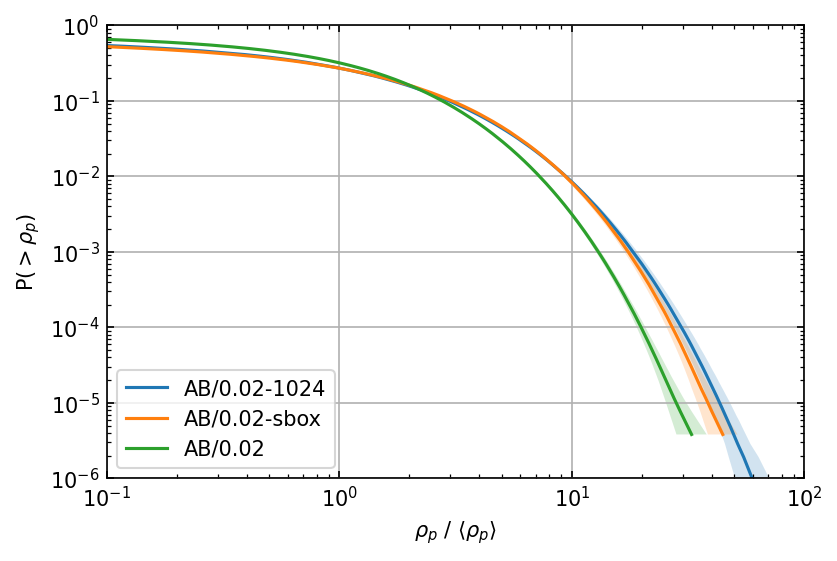

In [39]:
fig, ax = plt.subplots(dpi=150)
runs = {'AB/0.02-1024':   ['lightskyblue'],
        'AB/0.02-sbox':   ['dodgerblue'],
        'AB/0.02':        ['tab:blue'],
        # 'AB/0.02-CFL0.3': ['darkblue']
        }

for run in runs:
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%run)
    data = np.load('../nonlinear/Pi/%s/output/cpdd.npz'%run)
    ax.loglog(data['avgs'], data['cdf'], label=run)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.set(xlim=(0.1, 1e2), ylim=(1e-6, 1),
       xlabel=r'$\rho_p$ / $\langle \rho_p \rangle$',
       ylabel=r'P$(>\rho_p)$')
ax.legend(ncol=1, loc='lower left')
ax.grid()

## AB, Π=0.05

### Dust Density Dispersion

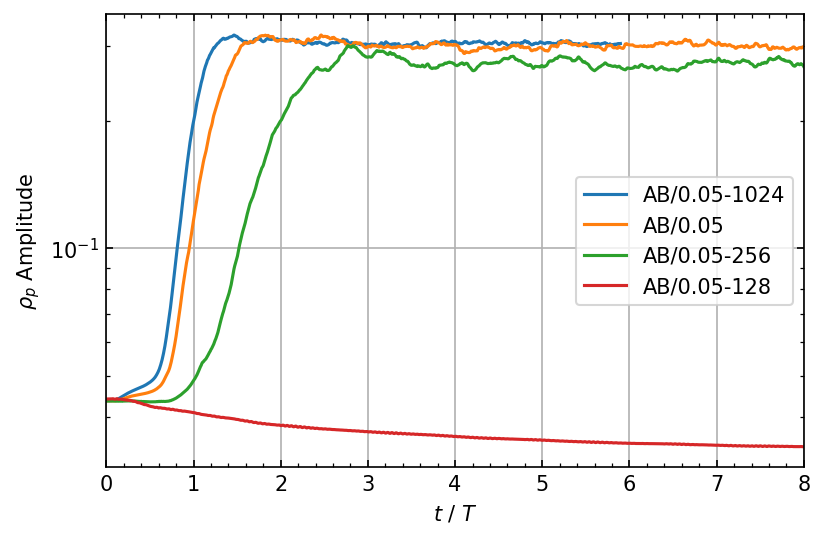

In [18]:
fig, ax = plt.subplots(dpi=150)
runs = {'AB/0.05-1024': ['greenyellow'],
        'AB/0.05':      ['lime'],
        'AB/0.05-256':  ['tab:green'],
        'AB/0.05-128':  ['darkgreen']}

for run in runs:
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s # dust dens. amp.
    ax.semilogy(times, rhop_amps, label=run)

ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\rho_p$ Amplitude',
       xlim=(0, 8))
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

### CPDD

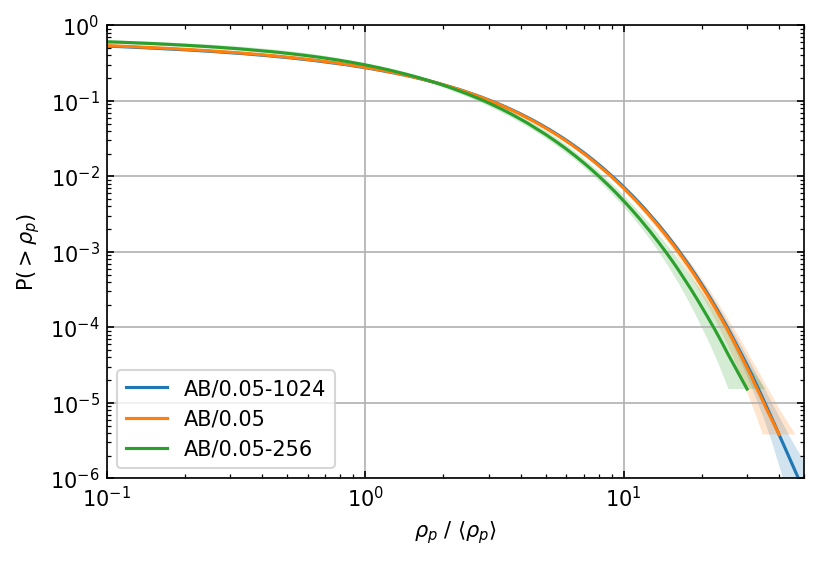

In [19]:
fig, ax = plt.subplots(dpi=150)
runs = {'AB/0.05-1024': ['greenyellow', 'solid'],
        'AB/0.05':      ['darkgreen',   'dotted'],
        'AB/0.05-256':  ['tab:green',   'solid']}

for run in runs:
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%run)
    data = np.load('../nonlinear/Pi/%s/output/cpdd.npz'%run)
    ax.loglog(data['avgs'], data['cdf'], label=run)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.set(xlim=(0.1, 50), ylim=(1e-6, 1),
       xlabel=r'$\rho_p$ / $\langle \rho_p \rangle$',
       ylabel=r'P$(>\rho_p)$')
ax.legend(ncol=1, loc='lower left')
ax.grid()

# BA

### Saturation (512²)

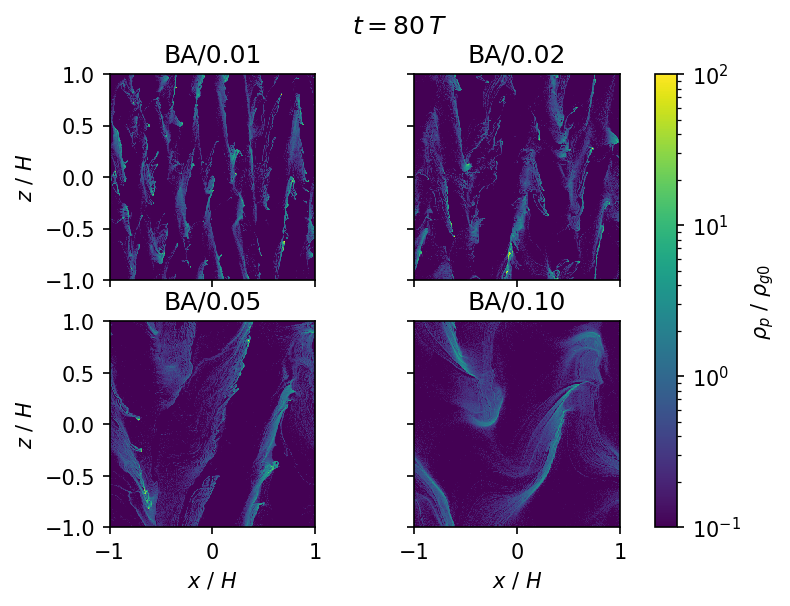

In [34]:
fig, axs = plt.subplots(2, 2, dpi=150)
runs = ['BA/0.01', 'BA/0.02', 'BA/0.05', 'BA/0.10']
vmin, vmax = 0.1, 100

for i,ax in enumerate(axs.flat):
    # Load run snapshot
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%runs[i])
    c_s = athinput['hydro']['iso_sound_speed'] # sound speed
    Omega = athinput['problem']['omega']       # local Keplerian angular frequency
    H = c_s/Omega                              # gas scale height
    T = 2*np.pi/Omega                          # orbital period
    outputs = sorted(list(Path('../nonlinear/Pi/%s/athdf/'%runs[i]).glob(
                  athinput["job"]["problem_id"]+'.out2.*.athdf')))
    data = athena_read.athdf(outputs[0])
    xf, zf = data['x1f']/H, data['x2f']/H
    clipped = np.clip(data['rhop'][0], vmin, vmax)
    
    # Plot
    img = ax.pcolormesh(xf, zf, clipped, norm=colors.LogNorm(vmin, vmax))
    ax.set(title=r'{:s}'.format(runs[i]), aspect='equal',
           xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.label_outer()
fig.suptitle(r'$t = {:.0f}\,T$'.format(data['Time']/T))
cb = fig.colorbar(img, ax=axs[:,:])
cb.set_label(r'$\rho_p$ / $\rho_{g0}$')

### 2D FFT (512²)

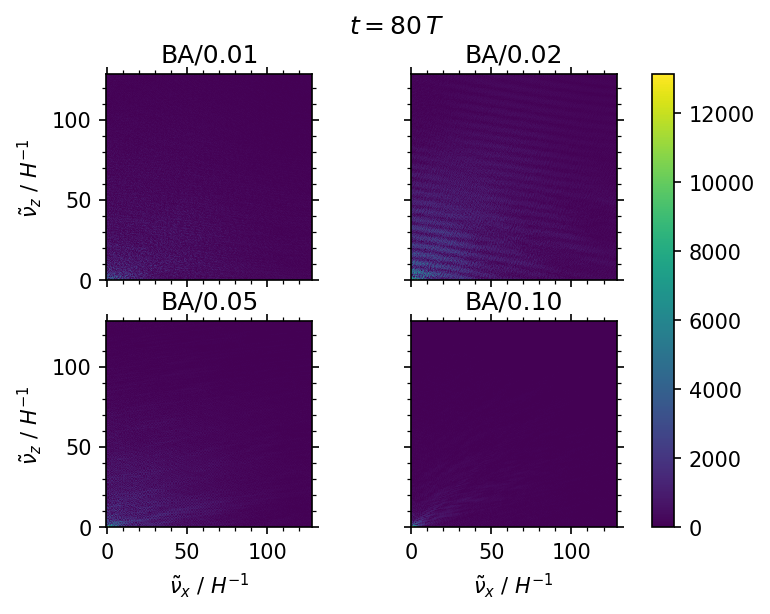

In [35]:
fig, axs = plt.subplots(2, 2, dpi=150)
runs = ['BA/0.01', 'BA/0.02', 'BA/0.05', 'BA/0.10']

for i,ax in enumerate(axs.flat):
    # Load snapshot and compute 2D FFT
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%runs[i])
    Lx = (athinput['mesh']['x1max'] - athinput['mesh']['x1min'])
    Lz = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])
    Nx = athinput['mesh']['nx1']
    Nz = athinput['mesh']['nx2']
    xrate = Nx/Lx # samples per gas scale height, H
    zrate = Nz/Lz
    νx = fft.rfftfreq(Nx, d=(1/xrate)) # sample wavenumbers
    νz = fft.rfftfreq(Nz, d=(1/zrate))
    outputs = sorted(list(Path('../nonlinear/Pi/%s/athdf/'%runs[i]).glob(
                  athinput["job"]["problem_id"]+'.out2.*.athdf')))
    data = athena_read.athdf(outputs[0])
    fft2 = fft.rfft2(data['rhop'][0], workers=4)
    
    # Plot
    fft2[0,0] = 0
    img = ax.pcolormesh(νx, νz, abs(fft2[:257,:]), shading='auto')
    ax.set(title='{:s}'.format(runs[i]), aspect='equal',
           xlabel=r'$\tilde{\nu}_x$ / $H^{-1}$',
           ylabel=r'$\tilde{\nu}_z$ / $H^{-1}$')
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)
fig.suptitle(r'$t = {:.0f}\,T$'.format(data['Time']))
cb = fig.colorbar(img, ax=axs[:,:])

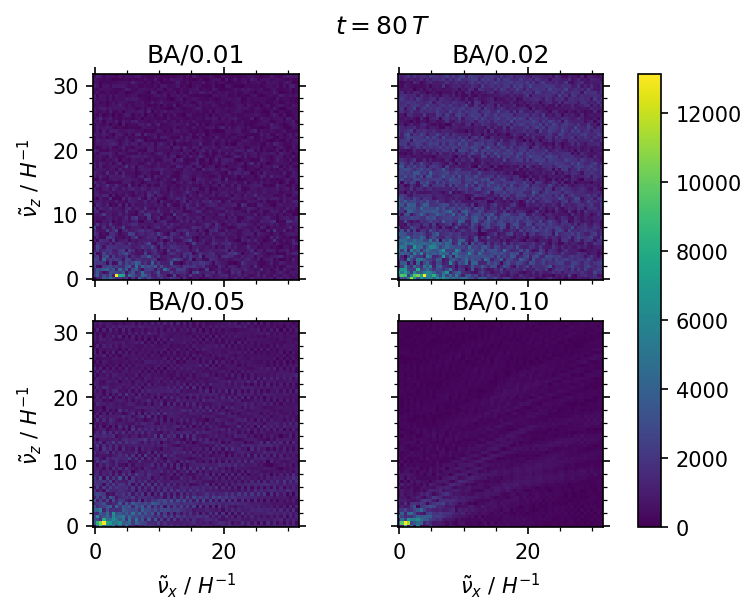

In [36]:
fig, axs = plt.subplots(2, 2, dpi=150)
runs = ['BA/0.01', 'BA/0.02', 'BA/0.05', 'BA/0.10']

for i,ax in enumerate(axs.flat):
    # Load snapshot and compute 2D FFT
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%runs[i])
    Lx = (athinput['mesh']['x1max'] - athinput['mesh']['x1min'])
    Lz = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])
    Nx = athinput['mesh']['nx1']
    Nz = athinput['mesh']['nx2']
    νx = fft.rfftfreq(Nx, d=(Lx/Nx)) # sample wavenumbers
    νz = fft.rfftfreq(Nz, d=(Lz/Nz))
    outputs = sorted(list(Path('../nonlinear/Pi/%s/athdf/'%runs[i]).glob(
                  athinput["job"]["problem_id"]+'.out2.*.athdf')))
    data = athena_read.athdf(outputs[0])
    fft2 = fft.rfft2(data['rhop'][0], workers=4)
    
    # Plot
    fft2[0,0] = 0 # zero out average amplitude
    img = ax.pcolormesh(νx[:64], νz[:64], abs(fft2[:64,:64]), shading='auto')
    ax.set(title='{:s}'.format(runs[i]), aspect='equal',
           xlabel=r'$\tilde{\nu}_x$ / $H^{-1}$',
           ylabel=r'$\tilde{\nu}_z$ / $H^{-1}$')
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)
fig.suptitle(r'$t = {:.0f}\,T$'.format(data['Time']))
cb = fig.colorbar(img, ax=axs[:,:])

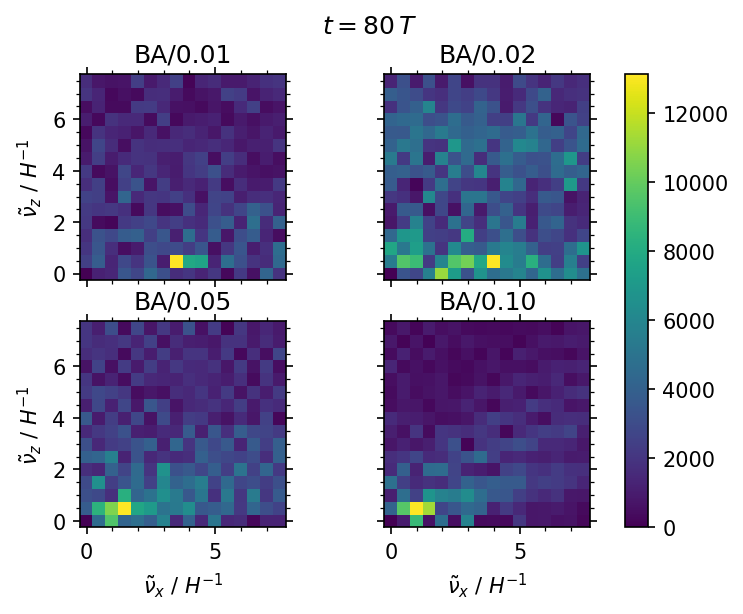

In [37]:
fig, axs = plt.subplots(2, 2, dpi=150)
runs = ['BA/0.01', 'BA/0.02', 'BA/0.05', 'BA/0.10']

for i,ax in enumerate(axs.flat):
    # Load snapshot and compute 2D FFT
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%runs[i])
    Lx = (athinput['mesh']['x1max'] - athinput['mesh']['x1min'])
    Lz = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])
    Nx = athinput['mesh']['nx1']
    Nz = athinput['mesh']['nx2']
    νx = fft.rfftfreq(Nx, d=(Lx/Nx)) # sample wavenumbers
    νz = fft.rfftfreq(Nz, d=(Lz/Nz))
    outputs = sorted(list(Path('../nonlinear/Pi/%s/athdf/'%runs[i]).glob(
                  athinput["job"]["problem_id"]+'.out2.*.athdf')))
    data = athena_read.athdf(outputs[0])
    fft2 = fft.rfft2(data['rhop'][0], workers=4)
    
    # Plot
    fft2[0,0] = 0 # zero out average amplitude
    img = ax.pcolormesh(νx[:16], νz[:16], abs(fft2[:16,:16]), shading='auto')
    ax.set(title='{:s}'.format(runs[i]), aspect='equal',
           xlabel=r'$\tilde{\nu}_x$ / $H^{-1}$',
           ylabel=r'$\tilde{\nu}_z$ / $H^{-1}$')
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)
fig.suptitle(r'$t = {:.0f}\,T$'.format(data['Time']))
cb = fig.colorbar(img, ax=axs[:,:])

## ΒΑ, Π=0.01

### Dust Density Dispersion

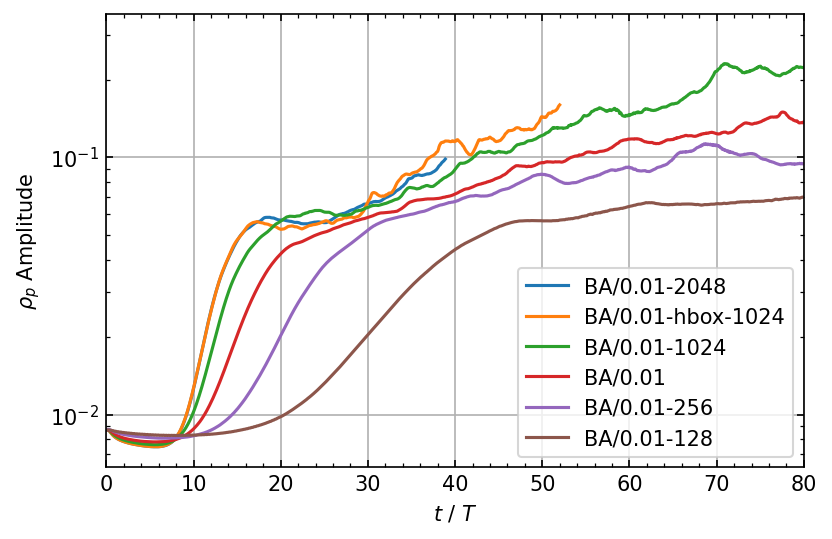

In [48]:
fig, ax = plt.subplots(dpi=150)
runs = {'BA/0.01-2048':      ['indigo'],
        'BA/0.01-hbox-1024': ['indigo'],
        'BA/0.01-1024':      ['plum'],
        'BA/0.01':           ['tab:purple'],
        'BA/0.01-256':       ['darkmagenta'],
        'BA/0.01-128':       ['mediumvioletred']}

for run in runs:
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s # dust dens. amp.
    ax.semilogy(times, rhop_amps, label=run)

ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\rho_p$ Amplitude', xlim=(0, 80))
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

### CPDD

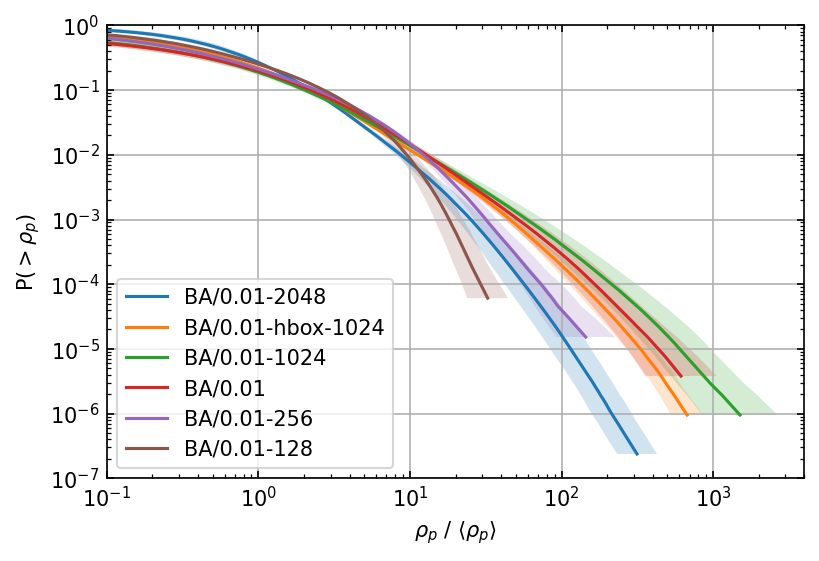

In [55]:
fig, ax = plt.subplots(dpi=150)
runs = {'BA/0.01-2048':      ['indigo'],
        'BA/0.01-hbox-1024': ['indigo'],
        'BA/0.01-1024':      ['plum'],
        'BA/0.01':           ['tab:purple'],
        'BA/0.01-256':       ['darkmagenta'],
        'BA/0.01-128':       ['mediumvioletred']}

for run in runs:
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%run)
    data = np.load('../nonlinear/Pi/%s/output/cpdd.npz'%run)
    ax.loglog(data['avgs'], data['cdf'], label=run)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.set(xlim=(0.1, 4e3), ylim=(1e-7, 1),
       xlabel=r'$\rho_p$ / $\langle \rho_p \rangle$',
       ylabel=r'P$(>\rho_p)$')
ax.legend(ncol=1, loc='lower left')
ax.grid()

## ΒΑ, Π=0.05

### Dust Density Dispersion

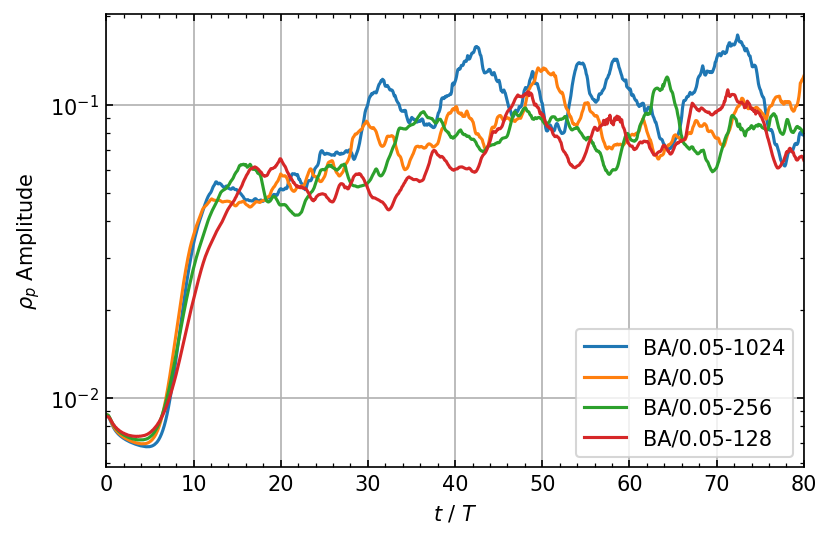

In [40]:
fig, ax = plt.subplots(dpi=150)
runs = {'BA/0.05-1024': ['greenyellow'],
        'BA/0.05':      ['lime'],
        'BA/0.05-256':  ['tab:green'],
        'BA/0.05-128':  ['darkgreen']}

for run in runs:
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%run)
    c_s = athinput['hydro']['iso_sound_speed']
    hst = athena_read.hst('../nonlinear/Pi/%s/output/SI.hst'%run)
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2) / c_s # dust dens. amp.
    ax.semilogy(times, rhop_amps, label=run)

ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\rho_p$ Amplitude', xlim=(0, 80))
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.legend()
ax.grid()

### CPDD

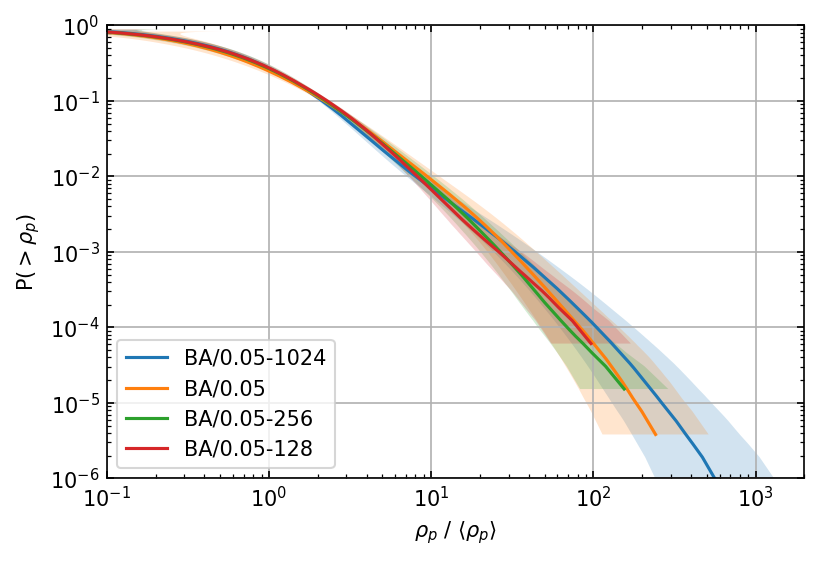

In [58]:
fig, ax = plt.subplots(dpi=150)
runs = {'BA/0.05-1024': ['greenyellow'],
        'BA/0.05':      ['lime'],
        'BA/0.05-256':  ['tab:green'],
        'BA/0.05-128':  ['darkgreen']}

for run in runs:
    athinput = athena_read.athinput('../nonlinear/Pi/%s/athinput.si'%run)
    data = np.load('../nonlinear/Pi/%s/output/cpdd.npz'%run)
    ax.loglog(data['avgs'], data['cdf'], label=run)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True, direction='in')
ax.set(xlim=(0.1, 2e3), ylim=(1e-6, 1),
       xlabel=r'$\rho_p$ / $\langle \rho_p \rangle$',
       ylabel=r'P$(>\rho_p)$')
ax.legend(ncol=1, loc='lower left')
ax.grid()